# TechLab - Trading Algoritmico Pt.1

Import delle librerie necessarie

In [1]:
%matplotlib notebook
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
import mplfinance as mpf
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import numpy as np

In [2]:
style.use('ggplot')

Eseguire il seguente codice per ottenere i dati on-line:

In [3]:
#start = dt.datetime(2000,1,1)
#end = dt.datetime(2018,12,31)
#df = web.DataReader('TSLA', 'yahoo', start, end)
#print(df.head())
#df.to_csv('Data/TSLA.csv')

Eseguire il seguente codice per ottenere i dati off-line:

In [4]:
df = pd.read_csv('Data/TSLA.csv', parse_dates=True, index_col=0)
print(df.head())

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


<IPython.core.display.Javascript object>


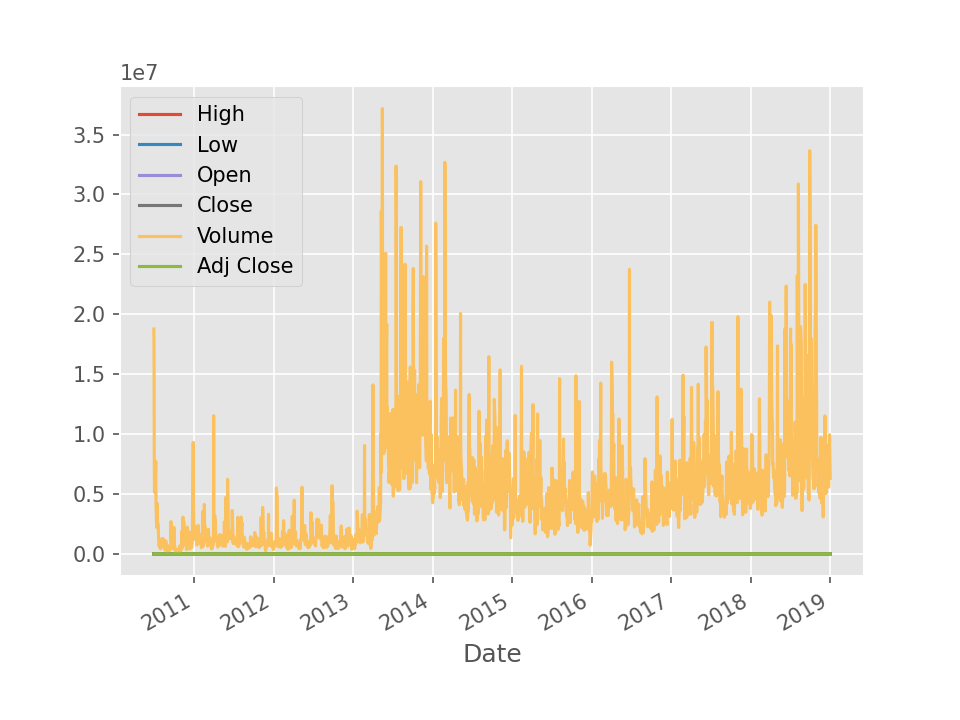

In [5]:
df.plot()

<IPython.core.display.Javascript object>


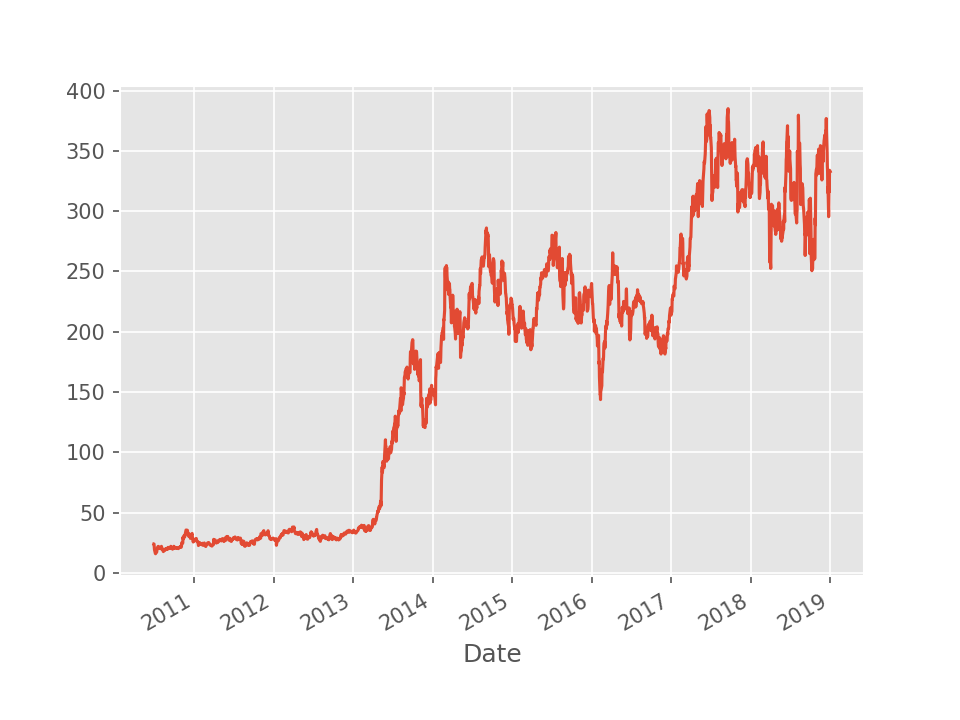

In [6]:
df['Adj Close'].plot()

In [7]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.head())

             High        Low       Open      Close    Volume  Adj Close  \
Date                                                                      
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999   
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000   
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999   
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001   
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


<IPython.core.display.Javascript object>


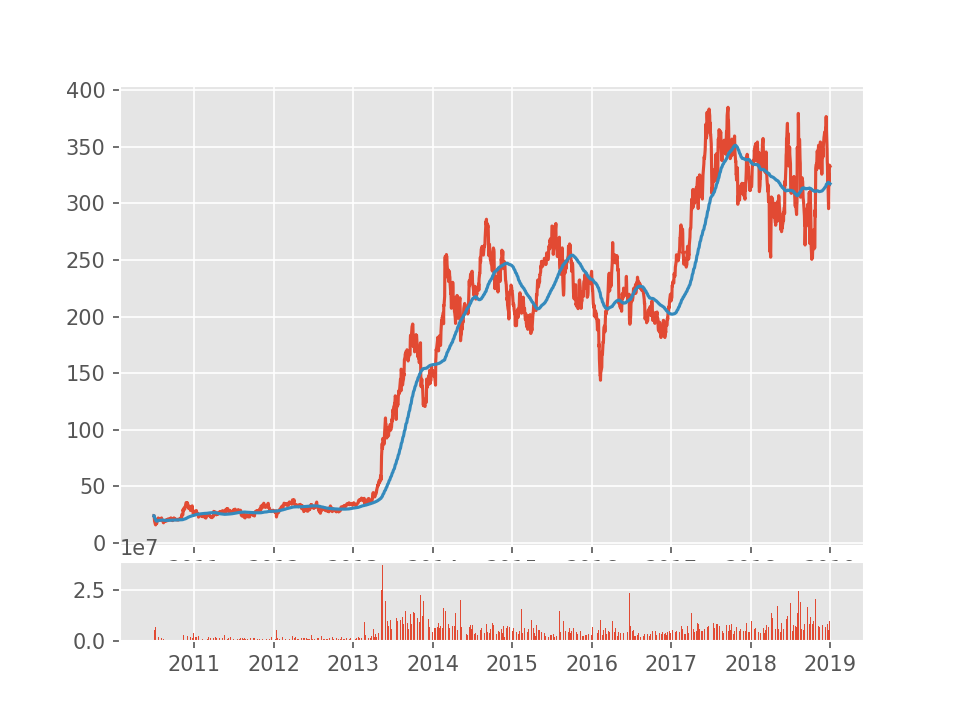

<BarContainer object of 2142 artists>

In [8]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

<IPython.core.display.Javascript object>


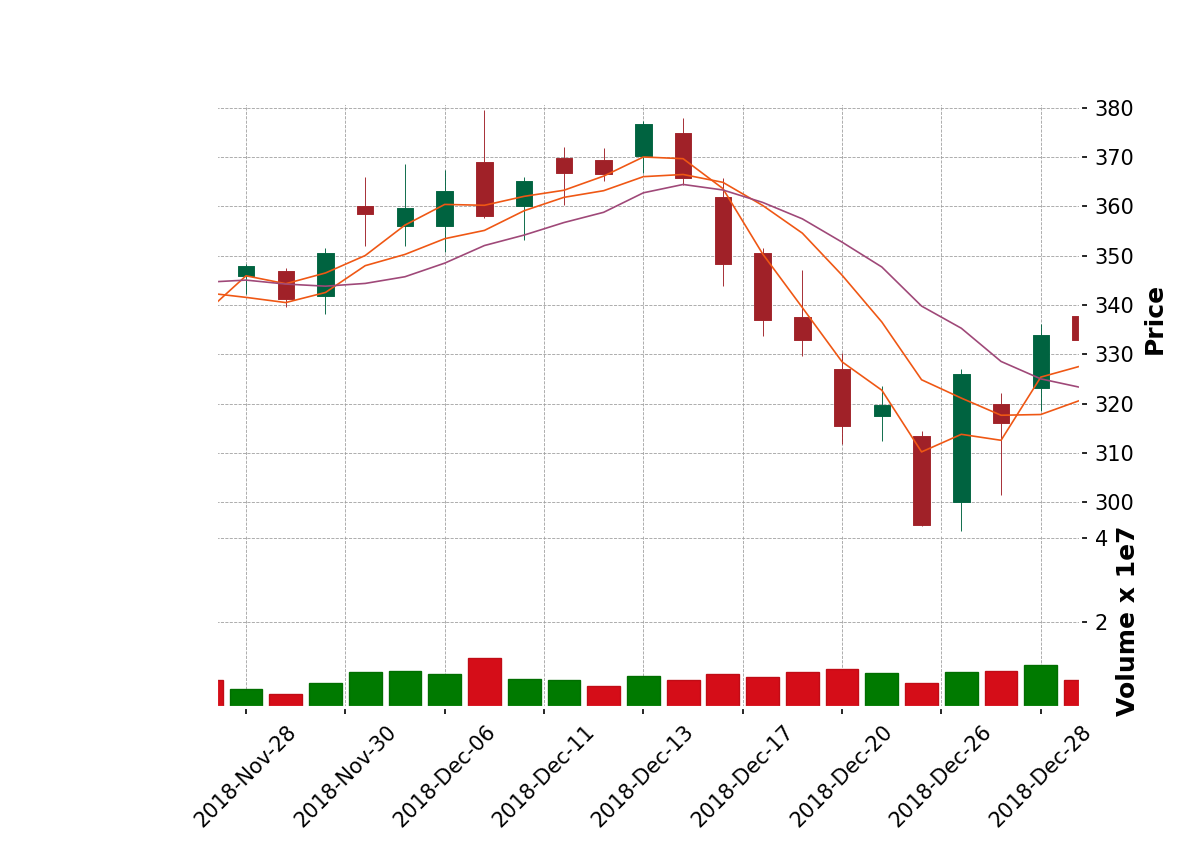

In [9]:
mpf.plot(df, type='candle', style='charles',
            volume=True, 
            mav=(3,6,9))